In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r'X:\Downloads\PRG4206 Machine Learning\Group\depress.csv')

In [3]:
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [9]:
data = data.dropna()
df = data.drop(columns=['depressed'])  #features only. remove the target column
target = data['depressed'].values   #the target only aka 'depressed or not?'

In [10]:
from sklearn.model_selection import train_test_split

#dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=0)

In [11]:
#BUILDING RANDOM FOREST MODEL WITH HYPERPARAMETERS

#generating random estimators
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)] #generator to generate random estimators
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [12]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [13]:
rf_Model = RandomForestClassifier()

In [14]:
#optimizing with GridSearchCV

from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [15]:
rf_Grid.fit(X_train, y_train)
#3200 fits to get the best model for dataset

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [16]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [20]:
#using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [21]:
rf_RandomGrid.fit(X_train, y_train)
#100 fits to get the best model for dataset

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [22]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 72}

In [23]:
rf_RandomGrid.best_params_

{'n_estimators': 41,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': False}

In [30]:
print('With Randomized Search')
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

With Randomized Search
Train Accuracy - : 0.994
Test Accuracy - : 0.993


In [29]:
print('With GridSearchCV')
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

With GridSearchCV
Train Accuracy - : 1.000
Test Accuracy - : 1.000


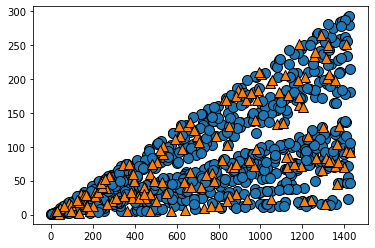

In [26]:
import mglearn

mglearn.discrete_scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)

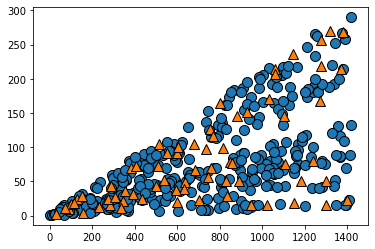

In [27]:
mglearn.discrete_scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test)